In [52]:
import warnings
warnings.filterwarnings("ignore")

In [53]:
import PIL
import cv2
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [54]:
widht = 75
height = 75

In [55]:
PATH = "Rock-Paper-Scissors/"
train_dir = os.path.join(PATH+"train")
train = keras.preprocessing.image_dataset_from_directory(train_dir,image_size=(widht,height),seed=40,validation_split=0.2,subset="training")
validation = keras.preprocessing.image_dataset_from_directory(train_dir,image_size=(widht,height),seed=40,validation_split=0.2,subset="validation")
test_dir = os.path.join(PATH,"test")
test = keras.preprocessing.image_dataset_from_directory(test_dir,image_size=(widht,height))

Found 2520 files belonging to 3 classes.
Using 2016 files for training.
Found 2520 files belonging to 3 classes.
Using 504 files for validation.
Found 372 files belonging to 3 classes.


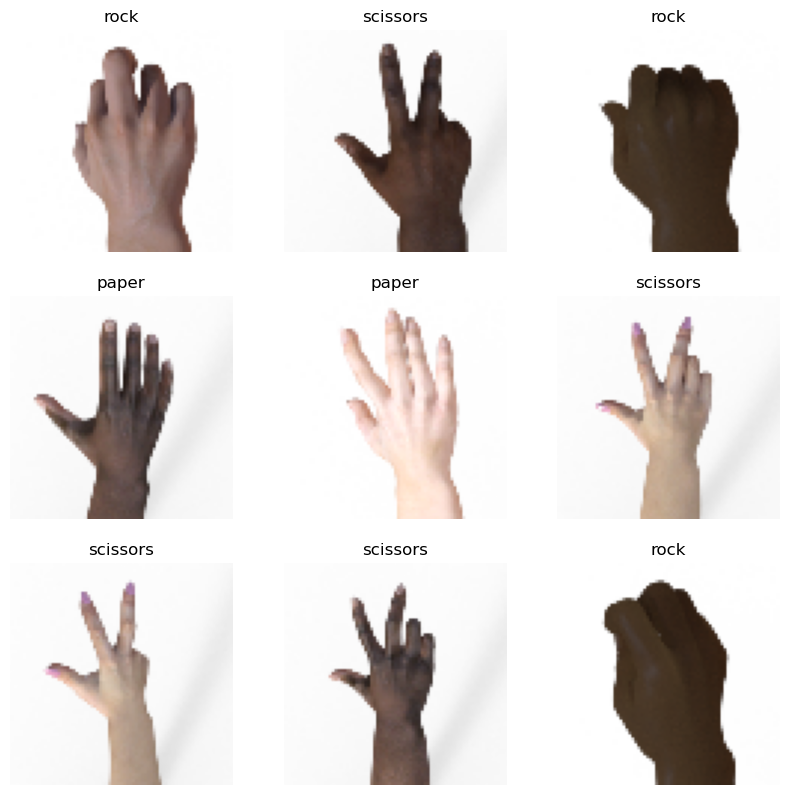

In [56]:
plt.figure(figsize=(10,10),dpi=100)
for images,labels in train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train.class_names[labels[i]])
        plt.axis(False)

In [57]:
scaler = keras.Sequential([keras.layers.experimental.preprocessing.Rescaling(1/255)])

In [58]:
model = keras.Sequential([ scaler,
keras.layers.Conv2D(32,kernel_size=3,strides=2,input_shape=(224, 224, 3),activation="relu"),
keras.layers.MaxPooling2D(2),
keras.layers.Conv2D(64,kernel_size=3,strides=2,activation="relu"),
keras.layers.MaxPooling2D(2),
keras.layers.SpatialDropout2D(0.2),
keras.layers.Conv2D(128,kernel_size=3,strides=1,activation="relu"),
keras.layers.MaxPooling2D(2),
keras.layers.SpatialDropout2D(0.2),
keras.layers.Flatten(),
keras.layers.Dense(50,activation="relu"),
keras.layers.Dropout(0.2),
keras.layers.Dense(3,activation="softmax")
])

In [59]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [60]:
history = model.fit(train,validation_data=validation,epochs=10)

Epoch 1/10
63/63 [==============================] - 4s 41ms/step - loss: 1.0739 - accuracy: 0.4102 - val_loss: 0.9383 - val_accuracy: 0.6290
Epoch 2/10
63/63 [==============================] - 3s 41ms/step - loss: 0.6625 - accuracy: 0.7376 - val_loss: 0.2451 - val_accuracy: 0.9683
Epoch 3/10
63/63 [==============================] - 3s 38ms/step - loss: 0.1875 - accuracy: 0.9444 - val_loss: 0.0652 - val_accuracy: 0.9940
Epoch 4/10
63/63 [==============================] - 3s 39ms/step - loss: 0.0788 - accuracy: 0.9807 - val_loss: 0.0511 - val_accuracy: 0.9940
Epoch 5/10
63/63 [==============================] - 3s 43ms/step - loss: 0.0422 - accuracy: 0.9886 - val_loss: 0.0276 - val_accuracy: 0.9940
Epoch 6/10
63/63 [==============================] - 3s 43ms/step - loss: 0.0289 - accuracy: 0.9926 - val_loss: 0.0211 - val_accuracy: 0.9940
Epoch 7/10
63/63 [==============================] - 3s 42ms/step - loss: 0.0205 - accuracy: 0.9960 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 8/10
63

In [76]:
accracy=model.evaluate(test)[1]*100
print("%.2f"%accracy,"%")

12/12 [==============================] - 0s 13ms/step - loss: 0.2337 - accuracy: 0.9247
92.47 %


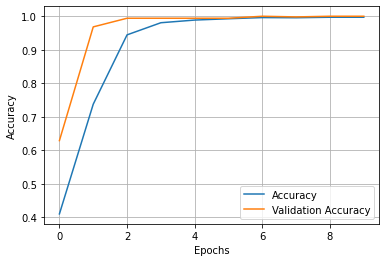

In [64]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df.accuracy,label="Accuracy")
plt.plot(history_df.val_accuracy,label="Validation Accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()

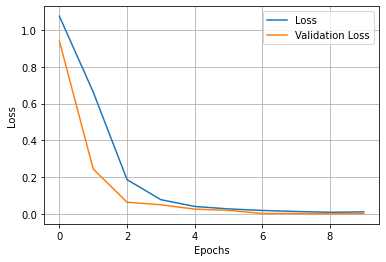

In [65]:
plt.plot(history_df.loss,label="Loss")
plt.plot(history_df.val_loss,label="Validation Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
